### 워드 클라우드 설치

In [3]:
pip install WordCloud

### 필요한 패키지 불러오기

In [5]:
# 워드클라우드
from wordcloud import WordCloud
# 데이터 시각화
import matplotlib.pyplot as plt
# 웹 데이터 수집 및 처리(크롤링)
from bs4 import BeautifulSoup as bs
import urllib.request as ur
import requests
# 데이터 조작
import pandas as pd
import numpy as np
# 화면 흐림 retina 설정
%config InlineBackend.figure_format = 'retina'
# 구글 드라이브 mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# matplotlib 한글 오류 처리
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치 완료 확인
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
# 폰트 종류 출력
[f for f in sys_font if 'Nanum' in f]

# 한글 폰트 적용
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumGothicCoding


### 뉴스기사 제목을 크롤링하고, 워드클라우드로 시각화하기

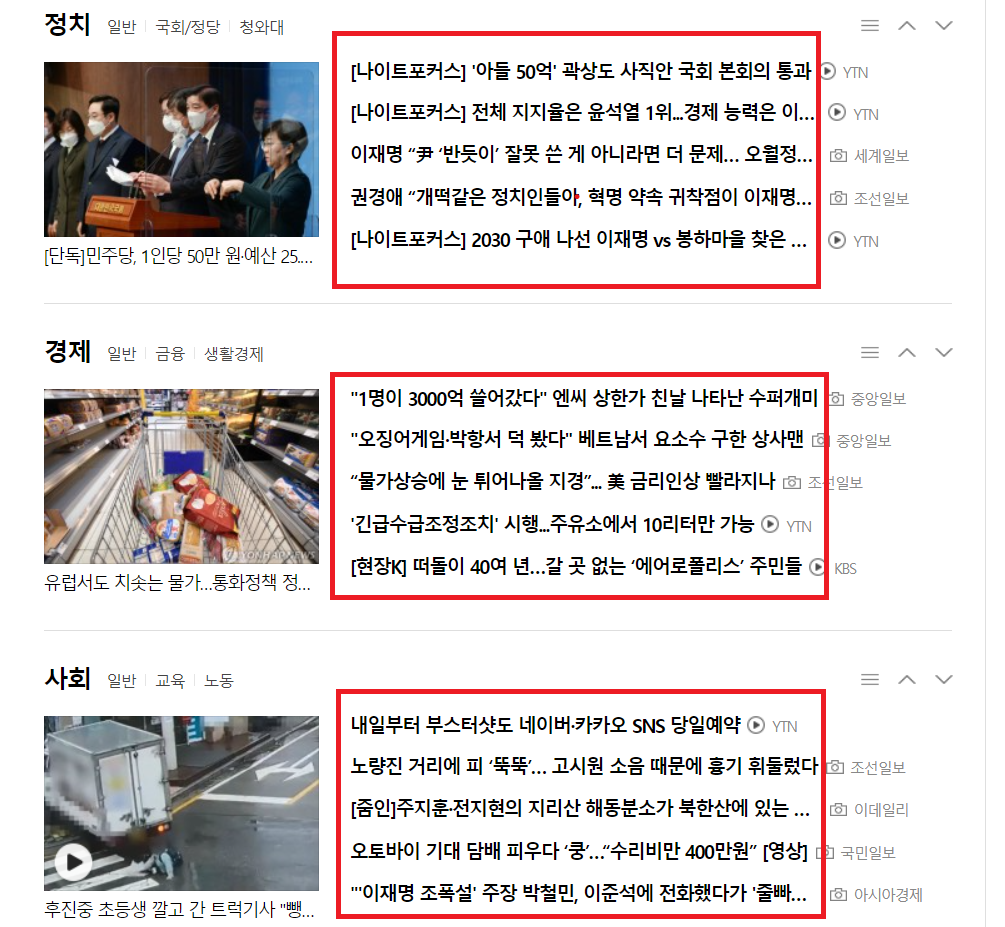

이재명 "'아프니까 청춘이다'라지만 젊은이들 너무 고통스러워…반성 중"
[현장] "이재명 대통령" "오빠야"…PK '들썩 들썩'
“여성들 너무 피해 보는 건 사실” 이재명 청년들과의 대화
이재명 “수천억원 해먹는 걸 보니 배아파” 유시민 “보통 ‘열받는다’ 해”
[주간政談<하>] 윤석열 '반듯이' 고친 민주당, 되레 '머쓱'
물가 오르면 몸값 오르는 '중고'…사야할 주식은 증시 새내기
'오징어 게임 신드롬에 블랙 푸드 뜬다
셀트리온 '렉키로나' 승인권고 하루만에 허가…"유럽서 정식 시판"
머스크, 테슬라 주식 8천억원 또 매각…나흘간 6조7천억원(종합)
"파키슨병 70대, 수영·스키 즐겨" 줄기세포 임상 해낸 한국인 [최준호의 첨단의 끝을 찾아서]
‘요소수 대란’ 정부 뒷북 대응에… 익산 ‘체육관 직거래’ 제동
잘 가던 오토바이 갑자기 '쿵'… 뒤쫓아가던 차량의 놀라운 반응속도
수능까지 5일…천기누설! 과목별 대응전략!
[단독] 이민구 작심토로 "김경수 한 건에 6억 쓰고도 감옥갔는데 이재명, 고작 2억 5천?"
택배 몰래 가져갔던 진상 고객... 직접 일 도우며 반전 사과
"얀마, 니가 석좌교수?" 시건방 떤 조영남 한방 먹인 친구 정체
마트 계산원도 누군가의 아내·엄마다
이명·안구충혈 지속 땐 뇌출혈 유발 ‘동정맥루’ 의심해야
학벌 보고 뽑는 회사 빠르게 줄어든다
1990년생의 귀농, 산골 깡촌 생존기
셀트리온 코로나19 치료제, 유럽서 사용승인 받아
"아이폰으로 드론 조종할까?"…애플, 드론시스템 특허 2건 출원
EU 집행위, 셀트리온 코로나19 항체치료제 정식 승인(종합)
미, 전기차 세제지원 제동걸리나…'여당내 야당' 맨친 의원 반대
EU, 셀트리온 코로나 항체치료제 렉키로나 승인
(영상)‘CES 2022’서도 韓기업이 주인공…혁신상 대거 수상
한국인 80%가 뽑는 사랑니…“버리지 말고 보관하세요”
쿠팡, 3분기 매출 5조2000억원... 영업적자는 계속
셀트리온 코로나 치료제 유럽승인 임박
“최악의 SNS 욕먹더니…” 인스타 중독 ‘이것’ 쓰면 해결

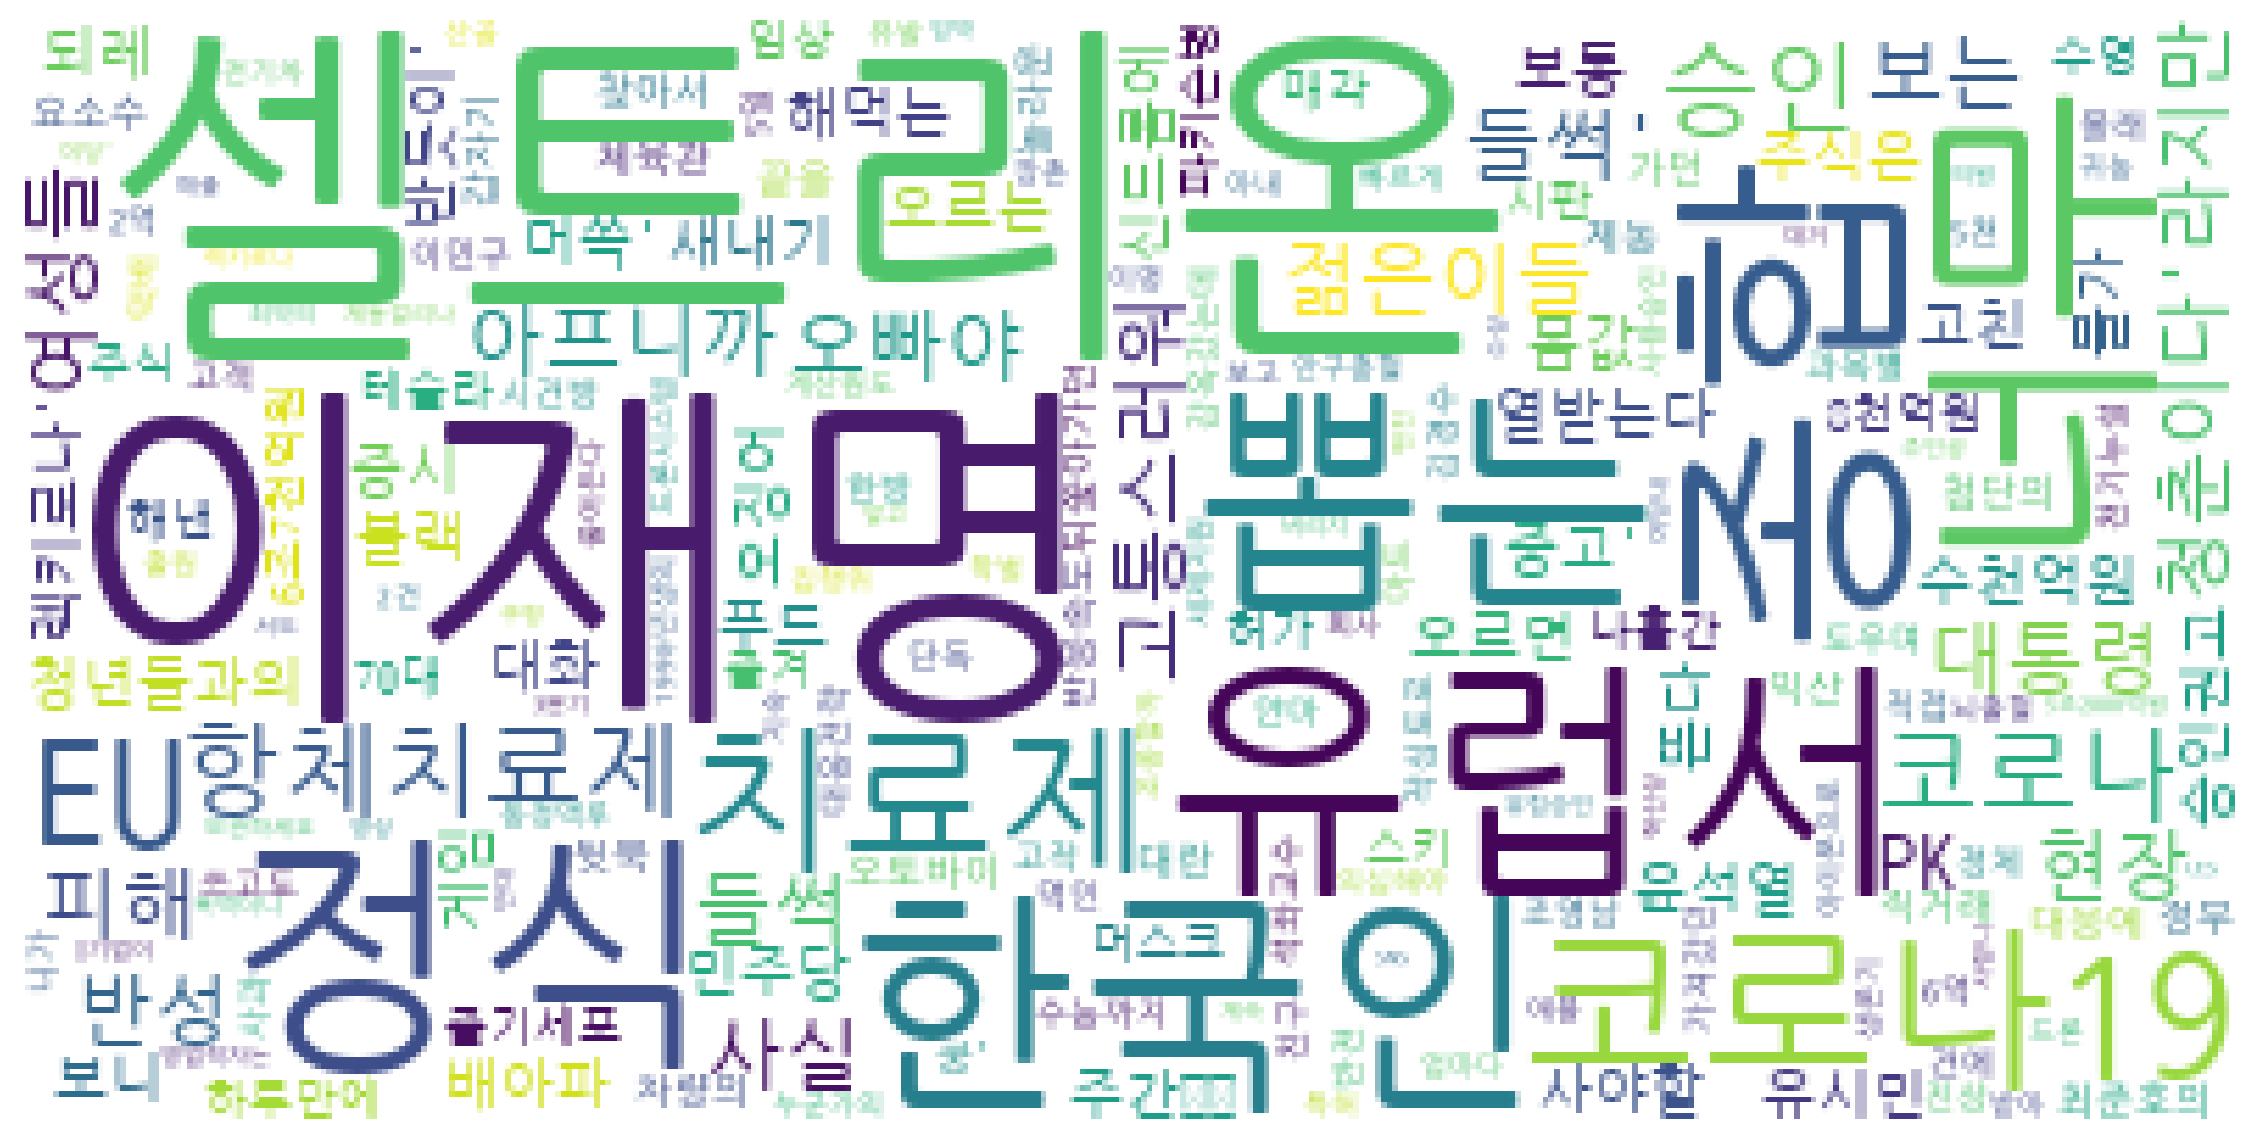

In [7]:
# 데이터를 수집할 url 주소
url = 'https://news.naver.com'
# BeautifulSoup를 이용해 html 파싱 하기
soup = bs(ur.urlopen(url).read(), 'html.parser')
# 최종 출력을 위한 리스트 생성
title_list = []
# 뉴스기사 제목을 가져올 수 있는 태그를 이용해서 처리 후 리스트에 넣어주기
for i in soup.select('.mlist2.no_bg'):
    a = i.select('a')
    for j in a:
        title = j.text.strip()
        print(title)
        title_list.append(title)

# 리스트를 문자열로 바꿔주기
title = '\n'.join(title_list)

# 워드 클라우드 생성
wordcloud = WordCloud(path, background_color='white' ,colormap='viridis').generate(title)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off') # 축 제거
plt.show()

In [8]:
def getData(keyword, num):
    # 반복1 (기사번호 변경시키면서 데이터 수집 반복)
    title_list=[]
    source_list=[]
    link_list=[]
    for n in range(1, num, 10):
        raw = requests.get(f'https://search.naver.com/search.naver?where=news&query={keyword}&start=' + str(n), headers={'User-Agent':'Mozilla/5.0'})
        html = bs(raw.text, 'html.parser')
        # 컨테이너 가져오기
        articles = html.select('ul.list_news > li')
        # 반복2 ( 세부 정보 수집(제목/언론사)
        for item in articles:
            title = item.select_one('a.news_tit').text
            source = item.select_one('a.info.press').text.replace('언론사 선정', '')
            link = item.select_one('a.news_tit').attrs['href']
            title_list.append(title)
            source_list.append(source)
            link_list.append(link)
    return title_list, source_list, link_list

검색어를 입력해주세요 : 코로나
뉴스기사 데이터를 수집할 페이지 수를 입력해주세요.. : 5


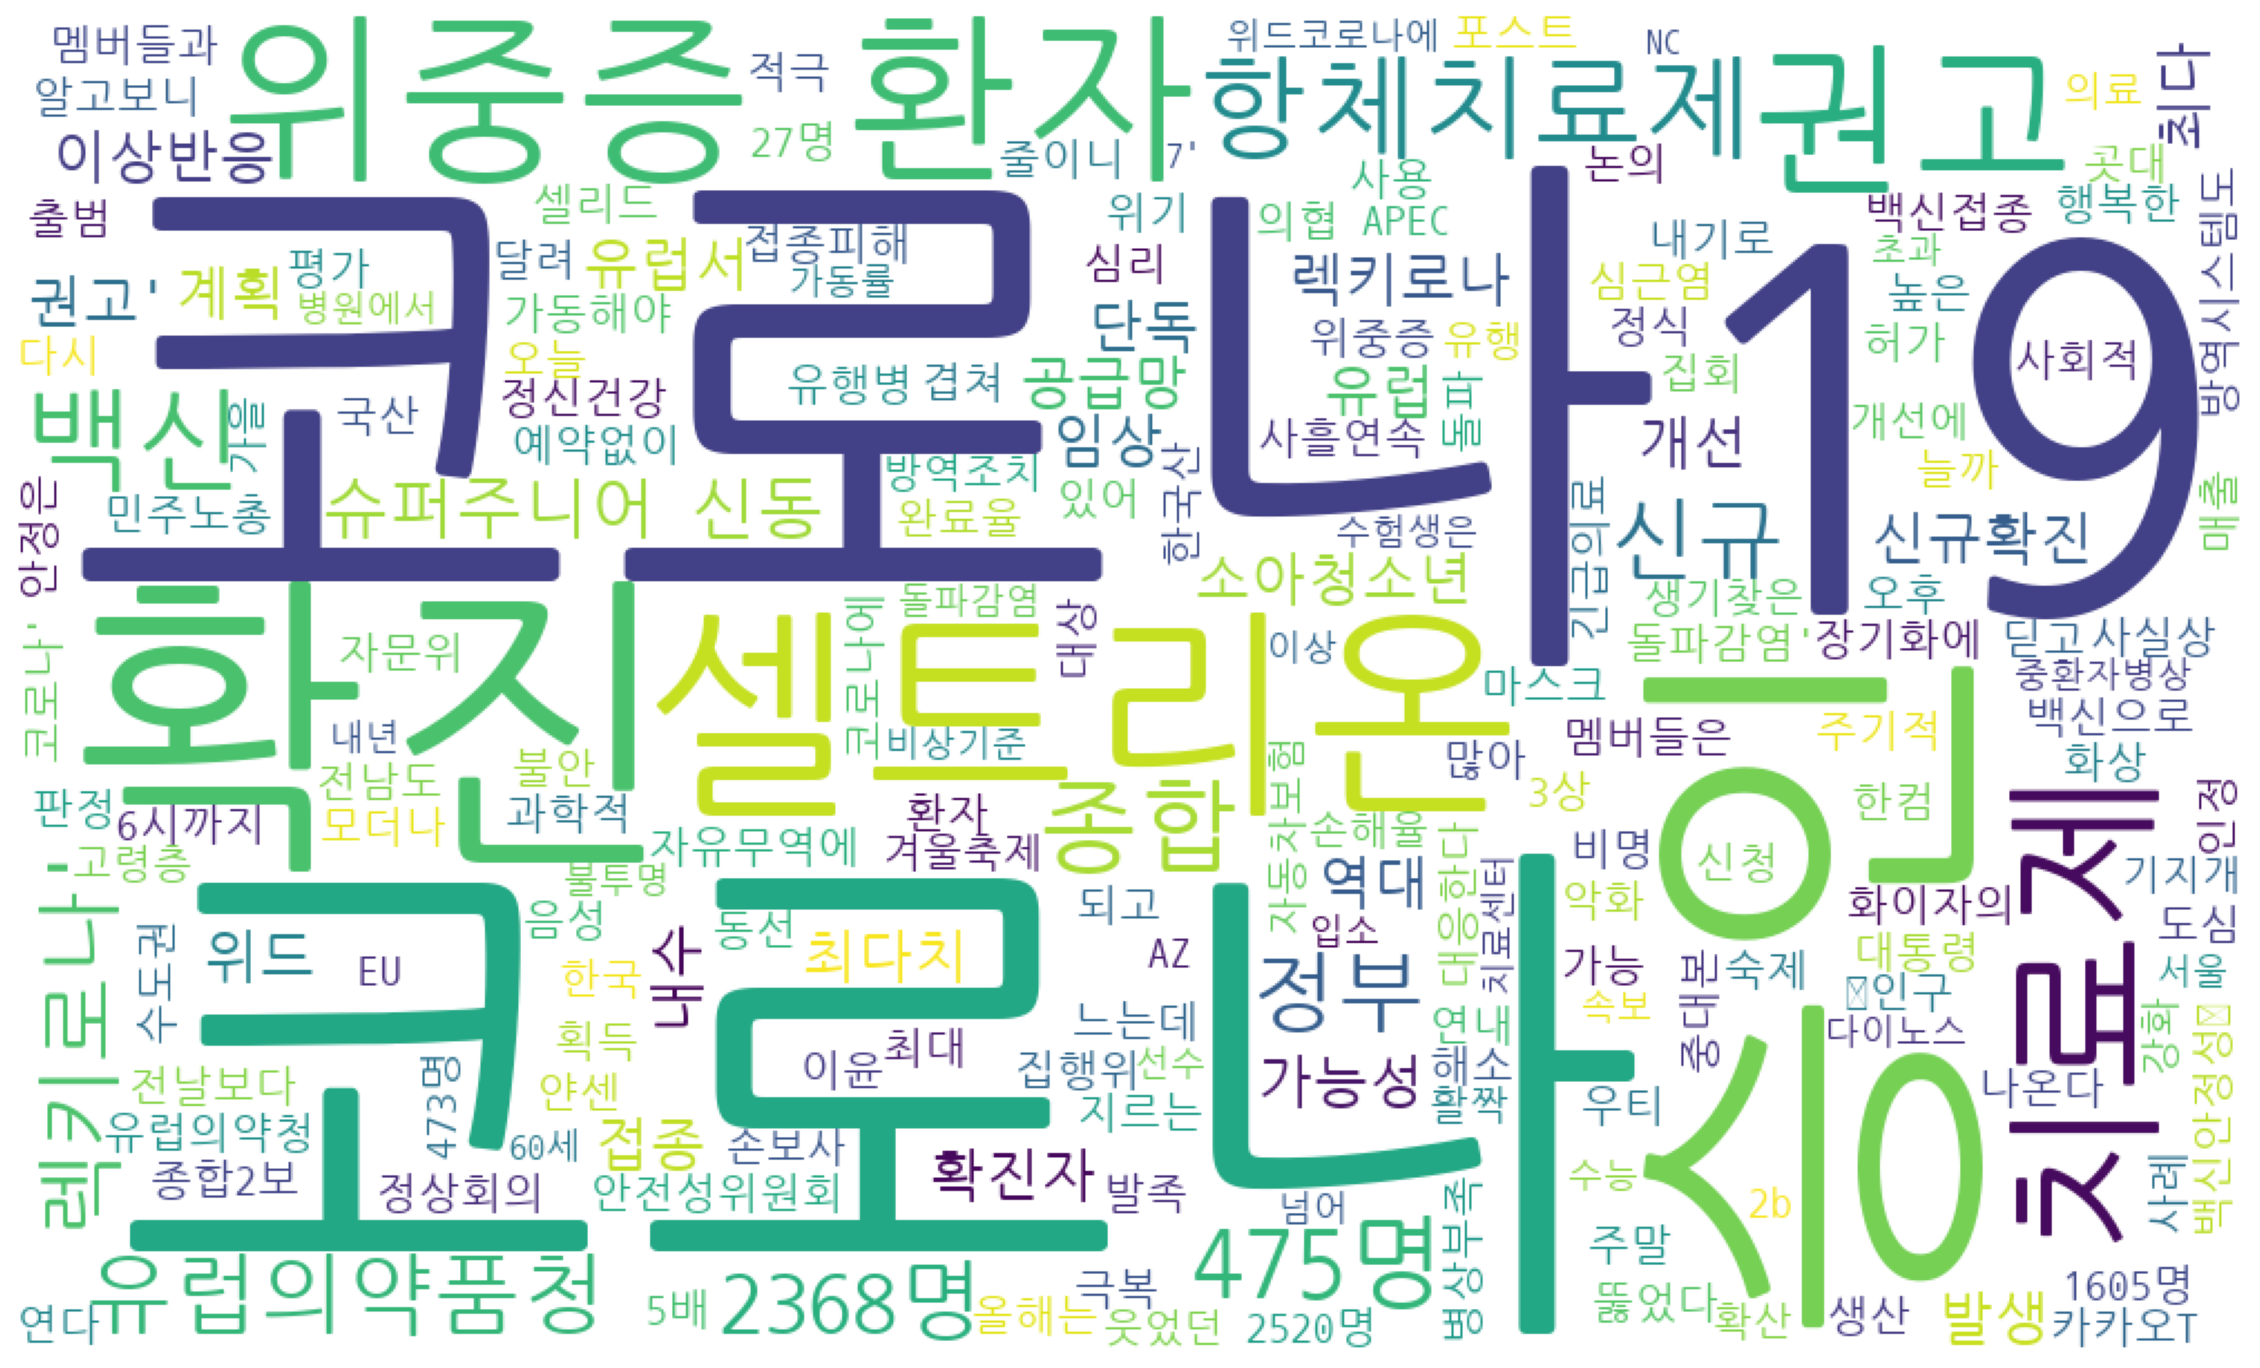

In [10]:
keyword = input('검색어를 입력해주세요 : ')
num = int(input('뉴스기사 데이터를 수집할 페이지 수를 입력해주세요.. : ')) * 10
title_list, source_list, link_list = getData(keyword,num)

# 리스트를 문자열로 변환
title = '\n'.join(title_list)

# 워드클라우드 생성
wc = WordCloud(width=1000, height=600, background_color='white', font_path=(path)).generate(title)
plt.figure(figsize=(20,15))
plt.imshow(wc)
plt.axis('off')
plt.show()

# 데이터프레임으로 만들고 csv파일로 저장
# 리스트를 딕셔너리로 만들어주기
data = {
    '제목' : title_list,
    '언론사' : source_list,
    'url' : link_list
}
# 딕셔너리를 DataFrame으로 변경
df = pd.DataFrame(data)

# csv파일로 저장
df.to_csv('naver_news_crawling.csv', encoding='euc-kr', index = False)